# <font color=blue>Contents</font>

1. <font color=blue>Introduction
2. Import the packages
3. Load the data
4. Subsetting the datasets with the numeric columns and the State
5. One-hot encoding for States
6. Model 1. MultiOutput Regressor </font>
    - <font color=green>6.1 MultiOutput Regressor model for all 4 datasets - Random Forest
    - 6.2 Model 2: MultiOutput Regressor model for all 4 datasets - Ridge</font>
7. <font color=blue>Model 2: OLS Linear Regression </font>
    - <font color=green>7.1 Standardizing the numeric columns
    - 7.2 Adding a constant and Train Test split of the datasets 
    - 7.3 OLS Model on 4 datasets
    
8. <font color=blue>Model 3: Random Forest Regressor
9. Comparison of performance metric R<sup>2</sup> of different models
10. Output: Random Forest Model on all the 4 datasets
11. Conclusion
    </blue>


# 1. Introduction

With the emission reports submitted by GHGRP(Greenhouse Gases Reporting Program) to EDA(Environmental Protection Agency of United States) over the past decade, 2011-2020, we are trying to see the pattern of how the emission has been taken care of by various industries in the different states of US. There has been some data missing in the earlier industries, as more industries started to report the emissions data in the recent years. So, this missing data has been handled by imputing the mean value of the emissions, thereby minimizing the effect of these imputed values on the original data. 

We are trying to see how the industries have been doing with the emissions and also eventually figure out and predict how the emissions will be after this decade, by 2030. EDA aims phasing down production and consumption by 85 percent over the next 15 years, maximizing reclamation and minimizing releases from equipment, and facilitating the transition to next-generation technologies through sector-based restrictions. A global HFC phasedown is expected to avoid up to 0.5° Celsius of global warming by 2100

Data Citation: 

U.S. Environmental Protection Agency Office of Atmospheric Programs
Greenhouse Gas Reporting Program (GHGRP)
[Compressed file contains a multi-year data summary spreadsheet containing the most important, high-level information for facilities, as well as yearly spreadsheets containing slightly more detailed information than the multi-year summary, including reported emissions by greenhouse gas and process.]
Available at https://www.epa.gov/ghgreporting/data-sets
Date accessed: [September, 2021]


# 2. Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import math

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge


# 3. Loading Data

In [2]:

df_de =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet3',index_col=0, engine='openpyxl')
df_oog =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet4',index_col=0, engine='openpyxl')
df_sf6 =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet5',index_col=0, engine='openpyxl')
df_ldc =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet6',index_col=0, engine='openpyxl')
de =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet1',index_col=0, engine='openpyxl')
sf6 =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet2',index_col=0, engine='openpyxl')
ldc =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet7',index_col=0, engine='openpyxl')
oog =pd.read_excel('../data/data_for_training_preprocessing.xlsx',sheet_name='sheet8',index_col=0, engine='openpyxl')




In [3]:
dfs = [df_de,df_sf6,df_oog,df_ldc]
for df in dfs:
    print(df.columns)
    print(df.shape)

Index(['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2020_perc_change', '2020_change_pattern',
       '2012_perc_change', 'emission_reduced_2012', '2013_perc_change',
       'emission_reduced_2013', '2014_perc_change', 'emission_reduced_2014',
       '2015_perc_change', 'emission_reduced_2015', '2016_perc_change',
       'emission_reduced_2016', '2017_perc_change', 'emission_reduced_2017',
       '2018_perc_change', 'emission_reduced_2018', '2019_perc_change',
       'emission_reduced_2019', 'emission_reduced_2020'],
      dtype='object')
(6515, 41)
Index(['FRD_id', 'Facility_Name', 'City', 'State', 'Zip_Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
   

# 4. Subsetting the datasets with the numeric columns and the State

The data has been sliced to have just the numerical columns with just the State column. We are analyzing the emissions from each State. 

In [4]:
columns = ['State','Latitude', 'Longitude','2020','2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011']
df_de_X = df_de[columns]
df_sf6_X = df_sf6[columns]
df_oog_X = df_oog[columns]
df_ldc_X = df_ldc[columns]
df_de_X.reset_index(drop=True,inplace=True)
df_sf6_X.reset_index(drop=True,inplace=True)
df_oog_X.reset_index(drop=True,inplace=True)
df_ldc_X.reset_index(drop=True,inplace=True)

# 5. One-hot encoded for States

One hot encoding is a process of converting the Categorical variables into Numerical variables so that the ML algorithms can do well with their perdiction.

In [5]:
df_de_st_dummies=pd.get_dummies(df_de_X['State'])
df_de_X_d= df_de_X.drop(['State','2020'],axis=1).join(df_de_st_dummies)
columns = df_de_X_d.columns
df_de_y=df_de_X[['2020']]
df_sf6_st_dummies=pd.get_dummies(df_sf6_X['State'])
df_sf6_X_d = df_sf6_X.drop(['State','2020'],axis=1).join(df_sf6_st_dummies)
df_sf6_y=df_sf6_X[['2020']]
df_oog_st_dummies=pd.get_dummies(df_oog_X['State'])
df_oog_X_d = df_oog_X.drop(['State','2020'],axis=1).join(df_oog_st_dummies)
df_oog_y=df_oog_X[['2020']]
df_ldc_st_dummies=pd.get_dummies(df_ldc_X['State'])
df_ldc_X_d= df_ldc_X.drop(['State','2020'],axis=1).join(df_ldc_st_dummies)
df_ldc_y=df_ldc_X[['2020']]


# 6. Model 1: MultiOutput Regressor

In [6]:
#Creating the model for DE dataset

#Dropping the 3 years data to enable prediction for 3 years
X = df_de_X.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df_de_X.State))
y= df_de_X[['2018','2019','2020']]

#Splitting data into training and test sets
df_de_X_train, df_de_X_test, df_de_y_train, df_de_y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)

#Defining the MultiOutputRegressor
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, max_depth=5, random_state=2))
regr_multirf.fit(df_de_X_train, df_de_y_train)

#Predicting for 3 years
y_multirf = regr_multirf.predict(df_de_X_test)


In [7]:
print('Mean squared error', mean_squared_error(df_de_y_test, y_multirf))
print('SQRT of R-squared', math.sqrt(mean_squared_error(df_de_y_test, y_multirf)))
print('Mean absolute error', mean_absolute_error(df_de_y_test, y_multirf))


rmse=np.sqrt(np.sum((y_multirf - df_de_y_test)**2)/len(df_de_y_test))
mae = np.sum(np.abs(y_multirf - df_de_y_test))/len(df_de_y_test)
den =np.sum((df_de_y_test-np.mean(df_de_y_test))**2)/len(df_de_y_test)
print('R-squared error for DE dataset:\n',1-(rmse/den))

Mean squared error 134179107608.71758
SQRT of R-squared 366304.6650108589
Mean absolute error 115680.81348233084
R-squared error for DE dataset:
 2018    1.0
2019    1.0
2020    1.0
dtype: float64


## 6.1 MultiOutput Regressor model for all 4 datasets - Random Forest

In [8]:
Xs = [df_de_X,df_sf6_X,df_oog_X,df_ldc_X]
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, max_depth=3, random_state=2))
y_multirf=[]
for df in Xs:
    X = df.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df.State))
    y= df[['2018','2019','2020']]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)
    regr_multirf.fit(X_train, y_train)
    y_multirf=regr_multirf.predict(X_test)
    
    rmse=np.sqrt(np.sum((y_multirf - y_test)**2)/len(y_test))
    mae = np.sum(np.abs(y_multirf - y_test))/len(y_test)
    den =np.sum((y_test-np.mean(y_test))**2)/len(y_test)
    print('R-squared error for dataset:\n',1-(rmse/den))

R-squared error for dataset:
 2018    1.0
2019    1.0
2020    1.0
dtype: float64
R-squared error for dataset:
 2018    0.999990
2019    0.999990
2020    0.999988
dtype: float64
R-squared error for dataset:
 2018    0.999998
2019    0.999998
2020    0.999997
dtype: float64
R-squared error for dataset:
 2018    0.999990
2019    0.999988
2020    0.999988
dtype: float64


Without the default parameters, the regressor is yielding the best results. 

## 6.2 MultiOutput Regressor model for all 4 datasets - Ridge

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


Xs = [df_de_X,df_sf6_X,df_oog_X,df_ldc_X]
regr_multiridge = make_pipeline(StandardScaler(with_mean=False), Ridge())
#regr_multiridge = MultiOutputRegressor(Ridge(normalize=True))
y_multirf=[]
for df in Xs:
    X = df.drop(['State','2018','2019','2020'],axis=1).join(pd.get_dummies(df.State))
    y= df[['2018','2019','2020']]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)
    regr_multiridge.fit(X_train, y_train)
    y_multiridge=regr_multiridge.predict(X_test)
    
    rmse=np.sqrt(np.sum((y_multiridge - y_test)**2)/len(y_test))
    mae = np.sum(np.abs(y_multiridge - y_test))/len(y_test)
    den =np.sum((y_test-np.mean(y_test))**2)/len(y_test)
    print('R-squared error for dataset:\n',1-(rmse/den))


R-squared error for dataset:
 2018    1.0
2019    1.0
2020    1.0
dtype: float64
R-squared error for dataset:
 2018    0.999988
2019    0.999991
2020    0.999985
dtype: float64
R-squared error for dataset:
 2018    0.999998
2019    0.999998
2020    0.999996
dtype: float64
R-squared error for dataset:
 2018    0.999991
2019    0.999988
2020    0.999983
dtype: float64


TThe R<sup>2</sup> scores show that the Ridge regressor is yielding the best results for the datasets, as well.

# 7. Model 2: Ordinary Least Squares



## 7.1 Standardizing the numeric columns

In [10]:
scaler = preprocessing.StandardScaler().fit(df_de_X_d)
df_de_X_s=pd.DataFrame(scaler.transform(df_de_X_d))
df_de_X_s.columns = df_de_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_sf6_X_d)
df_sf6_X_s=pd.DataFrame(scaler.transform(df_sf6_X_d))
df_sf6_X_s.columns = df_sf6_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_oog_X_d)
df_oog_X_s=pd.DataFrame(scaler.transform(df_oog_X_d))
df_oog_X_s.columns = df_oog_X_d.columns
scaler = preprocessing.StandardScaler().fit(df_ldc_X_d)
df_ldc_X_s=pd.DataFrame(scaler.transform(df_ldc_X_d))
df_ldc_X_s.columns = df_ldc_X_d.columns

## 7.2 Adding a constant and Train Test split of the datasets for a Linear Regression Model

In [11]:
df_de_X_s1 = sm.add_constant(df_de_X_s)
df_sf6_X_s1 = sm.add_constant(df_sf6_X_s)
df_oog_X_s1 = sm.add_constant(df_oog_X_s)
df_ldc_X_s1 = sm.add_constant(df_ldc_X_s)

df_de_X_train, df_de_X_test, df_de_y_train, df_de_y_test=train_test_split(df_de_X_s1, df_de_y, test_size = 0.25, random_state = 246)
df_sf6_X_train, df_sf6_X_test, df_sf6_y_train, df_sf6_y_test=train_test_split(df_sf6_X_s1, df_sf6_y, test_size = 0.25, random_state = 246)
df_oog_X_train, df_oog_X_test, df_oog_y_train, df_oog_y_test=train_test_split(df_oog_X_s1, df_oog_y, test_size = 0.25, random_state = 246)
df_ldc_X_train, df_ldc_X_test, df_ldc_y_train, df_ldc_y_test=train_test_split(df_ldc_X_s1, df_ldc_y, test_size = 0.25, random_state = 246)


## 7.3 OLS Model on 4 datasets

In [12]:
rModel_de = sm.OLS(df_de_y_train, df_de_X_train)
rModel_de_results = rModel_de.fit()
print(rModel_de_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1645.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:15:48   Log-Likelihood:                -67023.
No. Observations:                4886   AIC:                         1.342e+05
Df Residuals:                    4821   BIC:                         1.346e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.728e+05   3165.356    117.768      0.0

### The R-squared value of .956 determines that model is working well with this Direct Emission data. 

In [13]:
rModel_sf6 = sm.OLS(df_sf6_y_train, df_sf6_X_train)
rModel_sf6_results = rModel_sf6.fit()
rModel_sf6_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2.751
Date:                Wed, 03 Aug 2022   Prob (F-statistic):            0.00457
Time:                        19:15:49   Log-Likelihood:                -724.60
No. Observations:                  66   AIC:                             1531.
Df Residuals:                      25   BIC:                             1621.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.77e+04   4342.707      6.379      0.000    1.88e+04    3.66e+04
Latitude    6053.6565   2.02e+04      0.300      0.767   -3.55e+04    4.76e+04
Longitude   3.447e+04   4.08e+04      0.845      0.406   -4.95e+04    1.18e+05
2019         2.44e+04   1.28e+04      1.913      0.067   -1869.999    5.07e+04
2018       -9947.6394   9601.278     -1.036      0.310   -2.97e+04    9826.563
2017        2.473e+04   1.46e+04      1.698      0.102   -5274.817    5.47e+04
2016        4.182e+04   2.82e+04      1.485      0.150   -1.62e+04    9.98e+04
2015        4810.5649   1.92e+04      0.251      0.804   -3.47e+04    4.44e+04
2014       -1.129e+04   1.42e+04     -0.794      0.434   -4.06e+04     1.8e+04
2013          73.3121   1.83e+04      0.004      0.997   -3.76e+04    3.78e+04
2012       -2.587e+04   1.92e+04     -1.347      0.190   -6.54e+04    1.37e+04
2011        1.603e+04   2.59e+04      0.618      0.542   -3.74e+04    6.95e+04
AL         -4215.5720   3378.185     -1.248      0.224   -1.12e+04    2741.931
AZ          7955.2734   1.07e+04      0.746      0.462    -1.4e+04    2.99e+04
CA          1.789e+04   1.94e+04      0.920      0.366   -2.21e+04    5.79e+04
CO         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
FL         -4197.1367   6667.425     -0.629      0.535   -1.79e+04    9534.683
GA          -565.9265   4057.199     -0.139      0.890   -8921.885    7790.032
HI          1.579e+04   1.93e+04      0.817      0.421    -2.4e+04    5.56e+04
IA         -2927.9608   3942.747     -0.743      0.465    -1.1e+04    5192.279
IL          3938.4277   5288.806      0.745      0.463   -6954.072    1.48e+04
IN         -6910.4054   5531.425     -1.249      0.223   -1.83e+04    4481.779
KS         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
KY         -2167.5135   4885.951     -0.444      0.661   -1.22e+04    7895.290
LA          -2.08e+04   1.52e+04     -1.369      0.183   -5.21e+04    1.05e+04
MA         -6730.8310   7783.173     -0.865      0.395   -2.28e+04    9298.913
MI         -3903.4226   9006.778     -0.433      0.668   -2.25e+04    1.46e+04
MN          4632.3150   7102.710      0.652      0.520   -9995.991    1.93e+04
MO         -1970.1981   2873.577     -0.686      0.499   -7888.441    3948.045
NC         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
ND         -3232.1197   5465.825     -0.591      0.560   -1.45e+04    8024.957
NE         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
NJ         -2952.9350    462.934     -6.379      0.000   -3906.366   -1999.504
NM          4317.7765   4215.080      1.024      0.315   -4363.344     1.3e+04
NV          7837.3412   8140.703      0.963      0.345   -8928.749    2.46e+04
NY         -7246.5068   1.54e+04     -0.472      0.641   -3.89e+04    2.44e+04
OH

### R-squared value is .815 for the SF6 dataset, which shows the possibility for improvement to the model.

In [14]:
rModel_ldc = sm.OLS(df_ldc_y_train, df_ldc_X_train)
rModel_ldc_results = rModel_ldc.fit()
rModel_ldc_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     944.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.14e-83
Time:                        19:15:49   Log-Likelihood:                -1247.1
No. Observations:                 123   AIC:                             2600.
Df Residuals:                      70   BIC:                             2749.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.751e+04    809.544     95.750      0.000    7.59e+04    7.91e+04
Latitude   -2851.2681   3789.634     -0.752      0.454   -1.04e+04    4706.919
Longitude    578.4717   7429.644      0.078      0.938   -1.42e+04    1.54e+04
2019        1.608e+05   1.81e+04      8.870      0.000    1.25e+05    1.97e+05
2018       -1.125e+04   2.46e+04     -0.456      0.649   -6.04e+04    3.79e+04
2017        1.077e+04    2.1e+04      0.512      0.610   -3.12e+04    5.27e+04
2016        2.392e+04   3.03e+04      0.789      0.433   -3.66e+04    8.44e+04
2015       -6.189e+04   2.98e+04     -2.080      0.041   -1.21e+05   -2534.734
2014        2210.6435   1.07e+04      0.206      0.837   -1.91e+04    2.36e+04
2013        1.003e+04   1.14e+04      0.880      0.382   -1.27e+04    3.27e+04
2012         1.12e+04   7115.324      1.574      0.120   -2989.932    2.54e+04
2011       -1897.5636   7129.442     -0.266      0.791   -1.61e+04    1.23e+04
AL          -555.1757   1036.182     -0.536      0.594   -2621.775    1511.424
AR          4795.5884    949.750      5.049      0.000    2901.371    6689.806
AZ            18.8965   1673.110      0.011      0.991   -3318.017    3355.810
CA           846.5516   2592.997      0.326      0.745   -4325.017    6018.120
CO          1704.2597   1357.731      1.255      0.214   -1003.650    4412.170
CT          -119.8047   2079.151     -0.058      0.954   -4266.541    4026.931
DE           175.3793   1273.092      0.138      0.891   -2363.722    2714.480
FL         -1208.5140   1518.556     -0.796      0.429   -4237.179    1820.151
GA           913.9540    721.051      1.268      0.209    -524.136    2352.044
IA           691.5308    915.744      0.755      0.453   -1134.863    2517.924
ID            90.8532   1332.683      0.068      0.946   -2567.100    2748.806
IL           172.9434    980.904      0.176      0.861   -1783.408    2129.295
IN           -84.2766    892.411     -0.094      0.925   -1864.134    1695.581
KS          -147.6672    984.680     -0.150      0.881   -2111.549    1816.215
KY           278.4362    789.142      0.353      0.725   -1295.457    1852.329
LA          -497.4949    984.926     -0.505      0.615   -2461.868    1466.878
MA           593.6672   2295.624      0.259      0.797   -3984.811    5172.146
MD             4.4132   1241.849      0.004      0.997   -2472.376    2481.202
MI           695.8636   1248.250      0.557      0.579   -1793.692    3185.419
MN          1717.2715   1317.241      1.304      0.197    -909.883    4344.426
MO           -60.5915    826.240     -0.073      0.942   -1708.476    1587.293
MS         -6071.3556     63.408    -95.750      0.000   -6197.820   -5944.891
MT           968.1465   2054.071      0.471      0.639   -3128.569    5064.862
NC            90.2269   1102.139      0.082      0.935   -2107.919    2288.373
NE

### R-squared value is .999 for the LDC dataset, the model is doing the maximum best.

In [15]:
rModel_oog = sm.OLS(df_oog_y_train, df_oog_X_train)
rModel_oog_results = rModel_oog.fit()
print(rModel_oog_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   2020   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     36.84
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           2.89e-82
Time:                        19:15:49   Log-Likelihood:                -4718.8
No. Observations:                 351   AIC:                             9494.
Df Residuals:                     323   BIC:                             9602.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.048e+05   9394.894     21.800      0.0

### R-squared value is .775 for the OOG dataset, the model has a lot of scope for improvement.

# 8. Model 3: Random Forest Regressor Model

RMSE for DE dataset:  359418.4770559491
MAE for DE dataset:  91493.89489457145
R-squared error for DE dataset:  0.9999997091002553


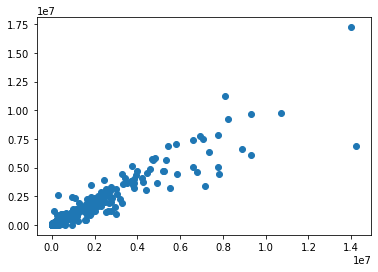

In [16]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
de_train = np.ravel(df_de_y_train)
rModel_de_res = reg.fit(df_de_X_train, de_train)
de_pred = rModel_de_res.predict(df_de_X_test)
de_test = np.ravel(df_de_y_test)
plt.scatter(de_pred,de_test)


rmse=np.sqrt(np.sum((de_pred - de_test)**2)/len(de_pred))
print('RMSE for DE dataset: ',rmse)
mae = np.sum(np.abs(de_pred - de_test))/len(de_pred)
print('MAE for DE dataset: ',mae)
den =np.sum((de_test-np.mean(de_test))**2)/len(de_test)
print('R-squared error for DE dataset: ',1-(rmse/den))

In [17]:
print(de_pred, de_test)

[168746.95573333 134855.01652447   8762.19853333 ...  74775.85826667
  49845.467       25320.8356    ] [193378.584 196779.85    4757.974 ...  96490.8    15247.804  18881.164]


RMSE for OOG dataset:  167214.06641913997
MAE for OOG dataset:  80872.30982692259
R-squared error for OOG dataset:  0.99999716392448


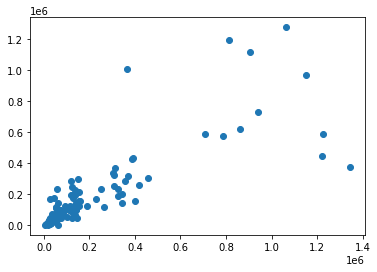

In [18]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
y_train = np.ravel(df_oog_y_train)
model_oog_res = reg.fit(df_oog_X_train, y_train)
oog_pred = model_oog_res.predict(df_oog_X_test)
oog_test = np.ravel(df_oog_y_test)
plt.scatter(oog_pred, oog_test)

rmse=np.sqrt(np.sum((oog_pred - oog_test)**2)/len(oog_pred))
print('RMSE for OOG dataset: ',rmse)
mae = np.sum(np.abs(oog_pred - oog_test))/len(oog_pred)
print('MAE for OOG dataset: ',mae)
den =np.sum((oog_test-np.mean(oog_test))**2)/len(oog_test)
print('R-squared error for OOG dataset: ',1-(rmse/den))

RMSE for LDC dataset:  5025.030076321013
MAE for LDC dataset:  3086.2842569105683
R-squared error for LDC dataset 0.9999969348431952


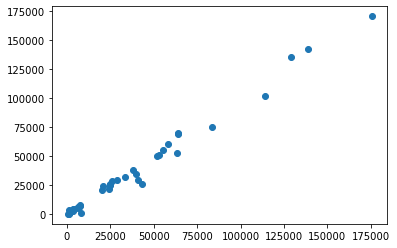

In [19]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
ldc_train = np.ravel(df_ldc_y_train)
rModel_ldc_res = reg.fit(df_ldc_X_train, ldc_train)
ldc_pred = rModel_ldc_res.predict(df_ldc_X_test)
ldc_test = np.ravel(df_ldc_y_test)
plt.scatter(ldc_pred,ldc_test)


rmse=np.sqrt(np.sum((ldc_pred - ldc_test)**2)/len(ldc_pred))
print('RMSE for LDC dataset: ',rmse)
mae = np.sum(np.abs(ldc_pred - ldc_test))/len(ldc_pred)
print('MAE for LDC dataset: ',mae)
den =np.sum((ldc_test-np.mean(ldc_test))**2)/len(ldc_test)
print('R-squared error for LDC dataset', 1-(rmse/den))

RMSE for SF6 dataset:  37304.66170046136
MAE for SF6 dataset:  21185.232321070238
R-squared error for SF6 dataset: 0.9999878036751283


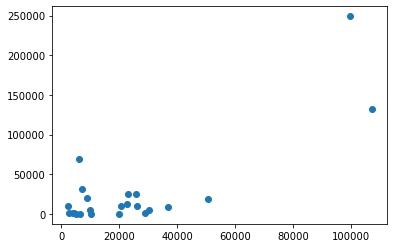

In [20]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)
sf6_train = np.ravel(df_sf6_y_train)
rModel_sf6_res = reg.fit(df_sf6_X_train, sf6_train)
sf6_pred = rModel_sf6_res.predict(df_sf6_X_test)
sf6_test = np.ravel(df_sf6_y_test)
plt.scatter(sf6_pred,sf6_test)


rmse=np.sqrt(np.sum((sf6_pred - sf6_test)**2)/len(sf6_pred))
print('RMSE for SF6 dataset: ',rmse)
mae = np.sum(np.abs(sf6_pred - sf6_test))/len(sf6_pred)
print('MAE for SF6 dataset: ',mae)
den =np.sum((sf6_test-np.mean(sf6_test))**2)/len(sf6_test)
print('R-squared error for SF6 dataset:', 1-(rmse/den))

### Random Forest Model is doing very well on all the four datasets.

# 9. Comparison of performance metric R<sup>2</sup> of different models

|Model Name|Hyperparamters|R<sup>2</sup> score|
|:-|:-|:-|
|OLS Linear Regression|||
|DE||0.956|
|SF6||0.815|
|OOG||0.775|
|LDC||0.999|
|Random Forest|
|All 4 datasets|n_estimators = 15|0.999|
|Multi output Ridge Regressor|
|All 4 datasets||0.999|


## Building a Random Forest Model to predict the future 10 years emission

RMSE for DE dataset:  116499.0729368651
MAE for DE dataset:  28730.47531361095
R-squared error for DE dataset:  0.9999998971832522


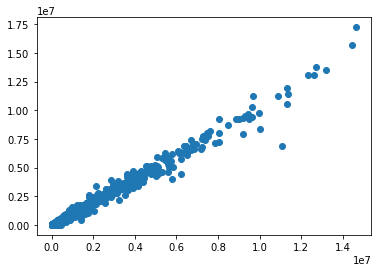

In [21]:
reg = RandomForestRegressor(n_estimators=15, random_state = 1)

de_train = np.ravel(df_de_y)
rModel_de_res = reg.fit(df_de_X_s, de_train)
de_pred = rModel_de_res.predict(df_de_X_s)
de_test = np.ravel(df_de_y)
plt.scatter(de_pred,de_test)

rmse=np.sqrt(np.sum((de_pred - de_test)**2)/len(de_pred))
print('RMSE for DE dataset: ',rmse)
mae = np.sum(np.abs(de_pred - de_test))/len(de_pred)
print('MAE for DE dataset: ',mae)
den =np.sum((de_test-np.mean(de_test))**2)/len(de_test)
print('R-squared error for DE dataset: ',1-(rmse/den))

In [22]:
print(df_de_y)

            2020
0     504064.000
1      60819.700
2      40521.812
3     100500.948
4      29359.640
...          ...
6510   22359.122
6511  325679.418
6512       0.000
6513  650907.100
6514   89476.750

[6515 rows x 1 columns]


In [23]:
years =  ['2020','2019', '2018', '2017', '2016','2015', '2014', '2013', '2012','2011']
years_future = ['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029']
y_future = {}
i=9
X1=df_de_X_s.copy()
df_de_y_ite = de_train
for year in years_future:
    rModel_de_res.fit(X1, df_de_y_ite)
    y_pred = rModel_de_res.predict(X1)
    #append the results to the dataframe
    X1 = X1.drop([years[-1]],axis = 1)
    X1[year] = y_pred
    df_de_y_ite = y_pred
    years.pop(i)
    i=i-1
rModel_de_res.fit(X1, df_de_y_ite)
X1['2030'] =rModel_de_res.predict(X1)

In [24]:
X1.head()

,Latitude,Longitude,AK,AL,AR,AZ,CA,CO,CT,DC,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,-0.671908,-0.242047,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,437919.076320,437968.067552,437946.003624,438082.359156,437713.133892,437924.212936,437816.460612,437654.821336,437840.893367,437760.498637
1,0.559976,1.102614,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,56024.380276,56020.454820,56022.717556,56013.480355,56015.916337,56013.356303,56024.066332,56026.392341,56027.683501,56030.162663
2,-0.798682,-0.658915,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,35021.585751,35016.966479,35019.087112,35018.509648,35015.682569,35015.822009,35015.482814,35015.032783,35016.415026,35015.210386
3,0.756044,0.272284,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,86046.623147,86028.935315,86031.229016,86017.427383,85997.462993,85997.363968,85997.307915,85996.704638,85996.301386,85995.845002
4,-0.944130,-0.388869,-0.098815,-0.164671,-0.124218,-0.117686,-0.247483,-0.132257,-0.078598,-0.024786,...,30352.103289,30343.563606,30336.042009,30331.327653,30329.979036,30327.806794,30327.255685,30324.567985,30324.400621,30320.936690


## Following the same steps for all the four data sets

In [25]:
Xs=[df_de_X_s,df_sf6_X_s,df_oog_X_s,df_ldc_X_s]
ys=[df_de_y,df_sf6_y,df_oog_y,df_ldc_y]
output=[]
for df in range(4):
    y = np.ravel(ys[df])
    X=Xs[df]
    years =  ['2020','2019', '2018', '2017', '2016','2015', '2014', '2013', '2012','2011']
    years_future = ['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029']
    i=9
    X1=X.copy()
    for year in years_future:
        rModel_res = reg.fit(X1, y)
        y_pred = rModel_res.predict(X1)
        #append the results to the dataframe
        X1 = X1.drop([years[-1]],axis = 1)
        X1[year] = y_pred
        y = y_pred
        years.pop(i)
        i=i-1
    rModel_res = reg.fit(X1, y)
    X1['2030'] =rModel_res.predict(X1)
    output.append(X1)

In [26]:
de_future = output[0]
sf6_future = output[1]
oog_future = output[2]
ldc_future = output[3]


# 10. Output - Future prediction

In [27]:
print(de_future, sf6_future, oog_future, ldc_future)

      Latitude  Longitude        AK        AL        AR        AZ        CA  \
0    -0.671908  -0.242047 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
1     0.559976   1.102614 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
2    -0.798682  -0.658915 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
3     0.756044   0.272284 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
4    -0.944130  -0.388869 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
...        ...        ...       ...       ...       ...       ...       ...   
6510 -0.923351  -0.101422 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
6511  0.863513   0.273532 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
6512  0.405063  -0.748091 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
6513 -1.576858  -0.286316 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   
6514 -0.276575   0.565839 -0.098815 -0.164671 -0.124218 -0.117686 -0.247483   

            CO        CT        DC  ...           2

In [28]:
df_de_pred = pd.DataFrame()
df_sf6_pred = pd.DataFrame()
df_ldc_pred = pd.DataFrame()
df_oog_pred = pd.DataFrame()

In [29]:
df_de_X.columns

Index(['State', 'Latitude', 'Longitude', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011'],
      dtype='object')

In [30]:
df_de_pred['State'] = df_de_X['State']
df_de_pred['2011'] = df_de_X['2011']
df_de_pred['2020']=df_de_X['2020']
df_de_pred['2030']=de_future['2030']
df_de_pred['reduction'] = 100*(df_de_pred['2020'] - df_de_pred['2030'])/df_de_pred['2030'] 

df_oog_pred['State'] = df_oog_X['State']
df_oog_pred['2011'] = df_oog_X['2011']
df_oog_pred['2020']=df_oog_X['2020']
df_oog_pred['2030']=oog_future['2030']
df_oog_pred['reduction'] = 100*(df_oog_pred['2020'] - df_oog_pred['2030'])/df_oog_pred['2030'] 

df_sf6_pred['State'] = df_sf6_X['State']
df_sf6_pred['2011'] = df_sf6_X['2011']
df_sf6_pred['2020']=df_sf6_X['2020']
df_sf6_pred['2030']=sf6_future['2030']
df_sf6_pred['reduction'] = 100*(df_sf6_pred['2020'] - df_sf6_pred['2030'])/df_sf6_pred['2030'] 

df_ldc_pred['State'] = df_ldc_X['State']
df_ldc_pred['2011'] = df_ldc_X['2011']
df_ldc_pred['2020']=df_ldc_X['2020']
df_ldc_pred['2030']=ldc_future['2030']
df_ldc_pred['reduction'] = 100*(df_ldc_pred['2020'] - df_ldc_pred['2030'])/df_ldc_pred['2030'] 


In [31]:
df_de_pred.columns

Index(['State', '2011', '2020', '2030', 'reduction'], dtype='object')

In [32]:
df_de_g = df_de_pred.groupby('State')[['2011','2020','2030']].mean().apply(lambda x: round(x,2))
df_oog_g = df_oog_pred.groupby('State')[['2011','2020','2030']].mean().apply(lambda x: round(x,2))
df_sf6_g = df_sf6_pred.groupby('State')[['2011','2020','2030']].mean().apply(lambda x: round(x,2))
df_ldc_g = df_ldc_pred.groupby('State')[['2011','2020','2030']].mean().apply(lambda x: round(x,2))

In [33]:
df_de_g['2020-30 %']=round(100*(df_de_g['2020'] - df_de_g['2030'])/df_de_g['2020'],2)
df_de_g['2011-20 %']=round(100*(df_de_g['2011'] - df_de_g['2020'])/df_de_g['2011'],2)
df_de_g['emission'] = 1
df_de_g.loc[df_de_g['2020-30 %']<0,'emission'] = -1

df_oog_g['2020-30 %']=round(100*(df_oog_g['2020'] - df_oog_g['2030'])/df_oog_g['2020'],2)
df_oog_g['2011-20 %']=round(100*(df_oog_g['2011'] - df_oog_g['2020'])/df_oog_g['2011'],2)
df_oog_g['emission'] = 1
df_oog_g.loc[df_oog_g['2020-30 %']<0,'emission'] = -1

df_sf6_g['2020-30 %']=round(100*(df_sf6_g['2020'] - df_sf6_g['2030'])/df_sf6_g['2020'],2)
df_sf6_g['2011-20 %']=round(100*(df_sf6_g['2011'] - df_sf6_g['2020'])/df_sf6_g['2011'],2)
df_sf6_g['emission'] = 1
df_sf6_g.loc[df_sf6_g['2020-30 %']<0,'emission'] = -1

df_ldc_g['2020-30 %']=round(100*(df_ldc_g['2020'] - df_ldc_g['2030'])/df_ldc_g['2020'],2)
df_ldc_g['2011-20 %']=round(100*(df_ldc_g['2011'] - df_ldc_g['2020'])/df_ldc_g['2011'],2)
df_ldc_g['emission'] = 1
df_ldc_g.loc[df_ldc_g['2020-30 %']<0,'emission'] = -1

In [34]:
de_red_emi = df_de_g.loc[df_de_g['emission'] == 1]
print("Cities that would have reduced direct emission as per the above predictive model: ")
print(de_red_emi[['2020','2030','2020-30 %']])

oog_red_emi = df_oog_g.loc[df_oog_g['emission'] == 1]
print("Cities that would have reduced emission by OOG as per the above predictive model: ")
print(oog_red_emi[['2020','2030','2020-30 %']])

sf6_red_emi = df_sf6_g.loc[df_sf6_g['emission'] == 1]
print("Cities that would have reduced SF6 emission as per the above predictive model: ")
print(sf6_red_emi[['2020-30 %']])

ldc_red_emi = df_ldc_g.loc[df_ldc_g['emission'] == 1]
print("Cities that would have reduced emission by LDC as per the above predictive model: ")
print(ldc_red_emi[['2020-30 %']])

Cities that would have reduced direct emission as per the above predictive model: 
            2020       2030  2020-30 %
State                                 
AK     227011.06  220716.70       2.77
AL     428724.98  400201.98       6.65
AZ     487898.79  452206.48       7.32
CA     240849.09  238725.19       0.88
CT     268620.23  258284.32       3.85
DE     309249.64  306042.13       1.04
FL     692818.77  666700.68       3.77
IL     330355.20  325557.84       1.45
KS     311466.99  303631.66       2.52
MA     127168.92  126943.97       0.18
MO     637050.23  604197.22       5.16
MS     387816.56  370623.76       4.43
ND     580395.25  575670.50       0.81
NE     370176.80  369025.48       0.31
NV     430280.33  421032.22       2.15
NY     171527.16  168970.74       1.49
OH     401268.46  392445.09       2.20
OK     286416.50  285461.69       0.33
PR     696112.75  647229.13       7.02
RI     349757.34  336147.98       3.89
SC     326637.72  324919.55       0.53
TX     441232.75  44

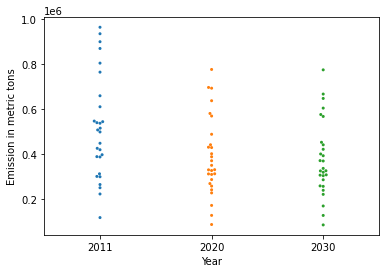

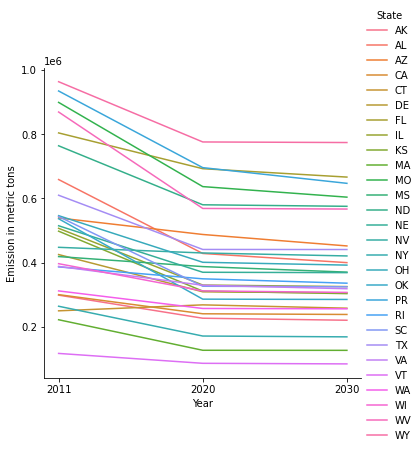

In [35]:
de = pd.melt(de_red_emi[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= de)
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=de )

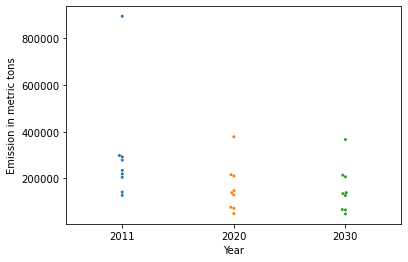

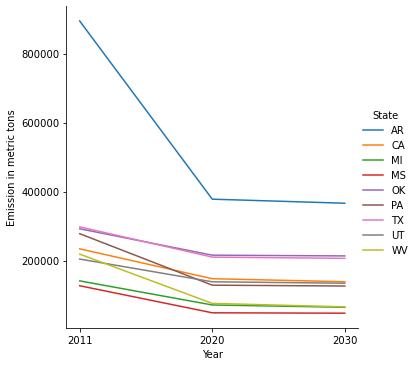

In [36]:
oog = pd.melt(oog_red_emi[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= oog)
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=oog )

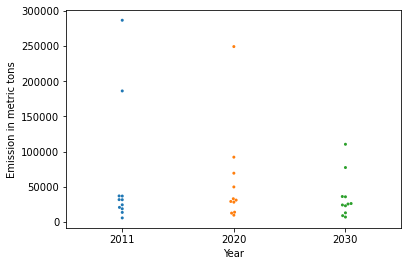

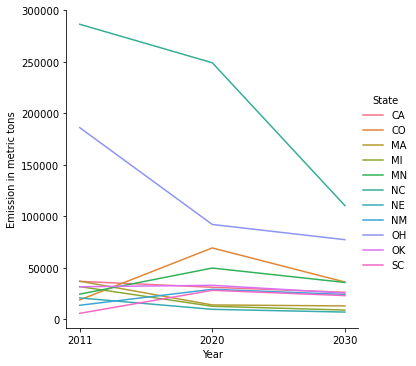

In [37]:
sf6 = pd.melt(sf6_red_emi[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= sf6)
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=sf6 )

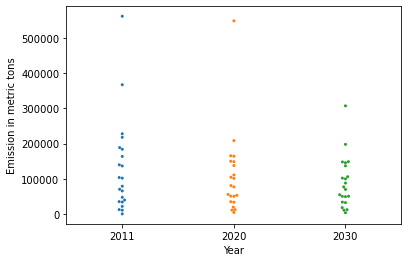

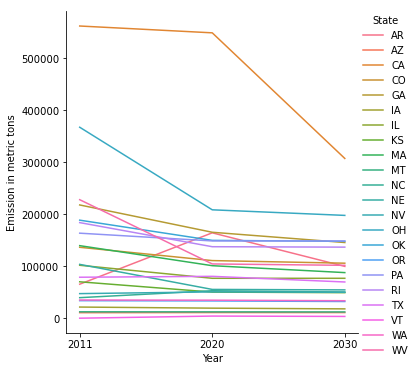

In [38]:
ldc = pd.melt(ldc_red_emi[['2011','2020','2030']],ignore_index=False,var_name='Year',value_name="Emission in metric tons")
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= ldc)
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=ldc )

# 11. Conclusion

With the data in the dataset, we can use only the regression technique. Time series models need more time-related data and so do not fit for this data. Among the three regression techniques, Random Forest regression model yielded best results. So for all the 4 different emission data from Direct Emitters, SF6, Local Dist. Companies (LDC) and Onshore Oil and Gas (OOG) companies, we trained the data with RF modeling technique and predicted the next 10 year's emission until 2030. 
The above charts shows the emission by the States that was predicted by the model to have reduced the emission by 2030.